# Step 0: Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# Step 1: Define constants

In [2]:
T = (1, 2)
E = (3,)
p = T + E
print(p)

(1, 2, 3)


This section defines constants to be used in the notebook

In [3]:
# Verbosity constants
ERROR = 1
WARNING = 2

VERBOSITY_DICT = {1: "ERROR",
                  2: "WARNING"}

# Zernike polynomials indexes
ZERNIKE_POLYNOMIALS_INDEXES = [
    ( 0, 0),
    (-1, 1),
    ( 1, 1),
    (-2, 2),
    ( 0, 2),
    ( 2, 2),
    (-3, 3),
    (-1, 3),
    ( 1, 3),
    ( 3, 3)
]

# Step 2: Compile functions

This section has all the necessary functions to create the surfaces based on the Zernike modes

In [6]:
def compute_zernike_polynomial_at_point(m_index,
                                        n_index,
                                        rho,
                                        varphi,
                                        verbose=False):
    """
    This function computes the value of a Zernike polynomial on polar coordinates given the Zernike coefficients
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        rho (float): The distance of the point to the center (radius in polar coordinates) 
        varphi(float): The angle of the point with respect to x-axis (angle in polar coordinates)
        
    Returns:
    """
    
    # First check if the zernike parameters are valid
    if not check_zernike_parameters(m_index, 
                                  n_index, 
                                  rho, 
                                  verbose):
        return False, None
    
    # Obtain the absolute value of the m index
    m_abs_index = abs(m_index)
    
    # Obtain the sign of the m index
    m_sign = 1
    if m_abs_index > 0:
        m_sign = m_index // m_abs_index
    
    # Compute the radial polynomial value at rho
    r_value = compute_radial_value(m_abs_index, 
                                   n_index, 
                                   rho,
                                   verbose)
    
    # Compute the zernike value
    if m_sign == 1:
        zernike_value = r_value * math.cos(m_abs_index * varphi)
    else:
        zernike_value = r_value * math.sin(m_abs_index * varphi)
        
    return zernike_value


def compute_radial_value(m_index,
                         n_index,
                         rho, 
                         verbose=False):
    """
    Computes the radial polynomial at ro given m and n indexes of the Zernike Polynomials
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        rho (float): The distance of the point to the center (radius in polar coordinates)
        
    Returns:
        r_value(float): The value of the radial polynomial at rho
    """
    
    # Default value of the polynomial
    if rho == 1:
        return 1
    
    # Value if n-m is odd
    r_value = 0
    
    
    n_minus_m = n_index - m_index
    module = n_minus_m % 2
    
    # If the module of n-m is even calculate
    if module == 0:
        # Compute the index of the sumatory and add 1 for the loop
        sumatory_index = (n_minus_m)//2 + 1
        
        # The summatory
        for k in range(0, sumatory_index):
            
            # Compute the numerator: (-1)^k * (n-k)!
            numerator = (-1)**k * math.factorial(n_index-k)
            
            # Compute the numbers from which we will compute their factorials for the denominator
            n_plus_m_d2_minus_k = (n_index + m_index)//2 - k  # (n+m)/2 - k
            n_minus_m_d2_minus_k = (n_index - m_index)//2 - k # (n-m)/2 - k
            
            # Compute denominator: k! * ((n+m)/2 - k)! *((n-m)/2 - k)!
            denominator = math.factorial(k) * math.factorial(n_plus_m_d2_minus_k) * math.factorial(n_minus_m_d2_minus_k)
            
            # Update the total sum
            r_value += numerator/denominator * rho**(n_index-2*k)
        
    return r_value
            
        
def check_zernike_parameters(m_index, 
                             n_index, 
                             rho, 
                             verbose=False):
    """
    This function checks that the zernike parameters are valid
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        rho (float): The distance of the point to the center (radius in polar coordinates) 
        verbose (bool): Indicates if the errors are displayed in console. Default is False.
    
    Returns:
        bool: True if the parameters are correct, False otherwise
    """
    
    # If n is lower than m there is an error
    if n_index < abs(m_index):
        if verbose:
            msg = f"The n index is smaller than m index: {n_index} < {abs(m_index)}"
            print_verbose_msg(msg, ERROR)
        return False
    
    # If the radius is less than 0 or greater than 1 there is an error
    if rho < 0 or rho > 1:
        if verbose:
            msg = f"The radius (ro) must be between -1 and 1. Radius is {rho}"
            print_verbose_msg(msg, ERROR)
        return False
    
    return True


def polar_samples_unit_circle_for_data_generation(n_circles=10, 
                                                  n_samples=50):
    """
    This function samples radiuses and angles from the unit disk to create random surfaces
    
    Input:
        n_circles (int): Optional. The number of concentric circles where the points will be sampled from
        n_samples (int): Optional. The number of samples of the outer circle of radius one. For the rest the number
                        of samples is proportional to the radius.
                        
    Returns:
        rho_samples (np.array): The array containing the radius polar coordinates of the points
        varphi_samples (np.array): The array containing the angle polar coordinates of the points
    """
    
    rho_samples = np.empty([0])
    varphi_samples = np.empty([0])
    
    for i in range(1, n_circles+1):
        n_subsamples = round((1 - (n_circles - i)/n_circles) * n_samples)
      
        i_radiuses = np.full((n_subsamples,), i/n_circles)
        i_thetas = np.arange(0, 2* np.pi, 2* np.pi/n_subsamples)
        
        rho_samples = np.concatenate((rho_samples, i_radiuses))
        varphi_samples = np.concatenate((varphi_samples, i_thetas))
    
    return rho_samples, varphi_samples


def polar_samples_unit_circle_for_plotting(n_radiuses=50, 
                                           n_angles=50):
    """
    This function samples radiuses and angles from the unit disk
    
    Input:
        n_radiuses (int): Optional. The number of radiuses to create the mesh
        n_samples (int): Optional. The number of angles to create the mesh
                        
    Returns:
        rho_samples (np.array): The array containing the radius polar coordinates of the points
        varphi_samples (np.array): The array containing the angle polar coordinates of the points
    """
    rho_samples = np.linspace(0, 1, n_radiuses)
    varphi_samples = np.linspace(0, 2*np.pi, n_angles)
    return rho_samples, varphi_samples


def plot_2d_polar_points(rho_samples, 
                         varphi_samples):
    """
    Plots a 2d graphic with points given radiuses and thetas
    
    Input:
        rho_samples (np.array): The array containing the radius polar coordinates of the points
        varphi_samples (np.array): The array containing the angle polar coordinates of the points
    
    Returns:
        None
    """
    fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
    ax.set_rticks([])
    ax.plot(varphi_samples, rho_samples, 'k.')


def print_verbose_msg(msg, 
                      level):
    """
    This function prints a message and its level of severity
    
    Input:
        msg (string): The message to display
        level (int): The dictionary key that contains the level of severity
    
    Returns:
        None
    """
    complete_msg = f"{VERBOSITY_DICT[level]}: {msg}"
    print(complete_msg)
    

def compute_zernike_polynomial_for_meshgrid(m_index,
                                            n_index, 
                                            rho_mesh,
                                            varphi_mesh,
                                            verbose=False):
    """
    Function to compute the zernike polynomials z component for plotting
    
    Input:
        m_index (int): The m number of the Zernike Polynomial
        n_index (int): The n number of the Zernike Polynomial
        rho_mesh (np.array): A 2d array containing the radius of the points' polar coordinates
        varphi_mesh(np.array): A 2d array containing the angle of the points' polar coordinates
        verbose (bool): True if more verbosity for errors
        
    Returns:
        zernike_mesh: The values of the zernike polynomial in the mesh grid
    """
    
    rows = rho_mesh.shape[0]
    columns = rho_mesh.shape[1]
    
    zernike_mesh = np.empty((rows, columns))
    
    for r in range(0, rows):
        for c in range(0, columns):
            rho = rho_mesh[r][c]
            varphi = varphi_mesh[r][c]
            zernike_mesh[r][c] = compute_zernike_polynomial_at_point(m_index,
                                                                     n_index,
                                                                     rho,
                                                                     varphi,
                                                                     verbose=verbose)
            
    return zernike_mesh


def plot_surface(zernike_polynomials,
                 n_radiuses=50,
                 n_angles=50,
                 verbose=False):
    """
    Plots a surface give the zernike polynomials and its coefficients
    
    Input:
        zernike_polynomials (list): A list of tuples with polynomials info (m_index, n_index, coefficient)
        n_radiuses (int): Optional. The number of radiuses to create the mesh
        n_angles (int): Optional. The number of angles to create the mesh
        
    Returns:
        None
    """
    
    rho_samples, varphi_samples = polar_samples_unit_circle_for_plotting(n_radiuses=n_radiuses,
                                                                         n_angles=n_angles)
    
    rho_mesh, varphi_mesh = np.meshgrid(rho_samples, varphi_samples)
    zernike_meshes = []
    
    
    for m_index, n_index, coefficient in zernike_polynomials:
        z_mesh = compute_zernike_polynomial_for_meshgrid(m_index,
                                                         n_index,
                                                         rho_mesh,
                                                         varphi_mesh,
                                                         verbose=verbose)
        weighted_z_mesh = coefficient * z_mesh
        zernike_meshes.append(weighted_z_mesh)
    
    
    rows = rho_mesh.shape[0]
    columns = rho_mesh.shape[1]
    surface_mesh = np.zeros((rows, columns))
    
    for submesh in zernike_meshes:
        surface_mesh += submesh
        
    
    X, Y = rho_mesh*np.cos(varphi_mesh), rho_mesh*np.sin(varphi_mesh)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # Plot the surface.
    ax.plot_surface(X, Y, surface_mesh, cmap=plt.cm.YlGnBu_r)
    

def get_random_zernike_coefficients():
    """
    Describes a random surface based on the zernike polynomials returning their indexes and coefficients to plot them
    Input:
        None
    
    Returns:
        zernike_polynomials (list): A list of tuples with polynomials info (m_index, n_index, coefficient)
    """
    coefficient_min = -10
    coefficient_max = 10
    
    zernike_polynomials = []
    
    for zpi in ZERNIKE_POLYNOMIALS_INDEXES:
        coef = random.uniform(coefficient_min, coefficient_max)
        zp = zpi + (coef,)
        zernike_polynomials.append(zp)

    return zernike_polynomials
    

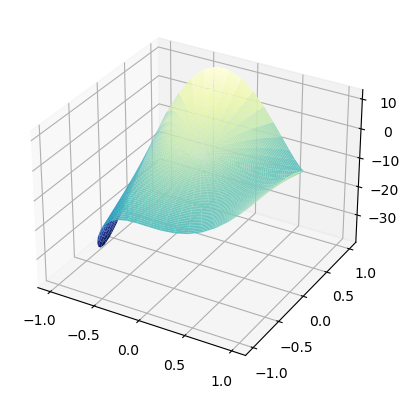

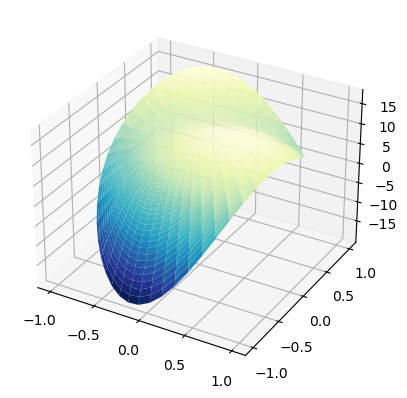

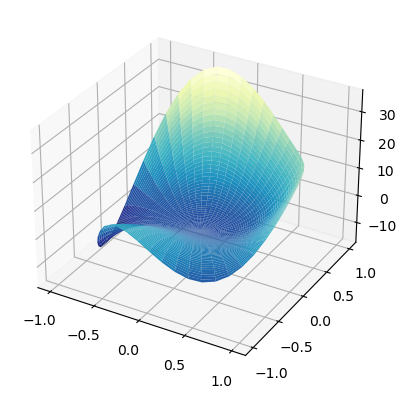

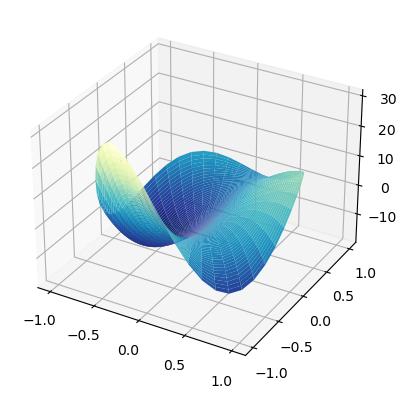

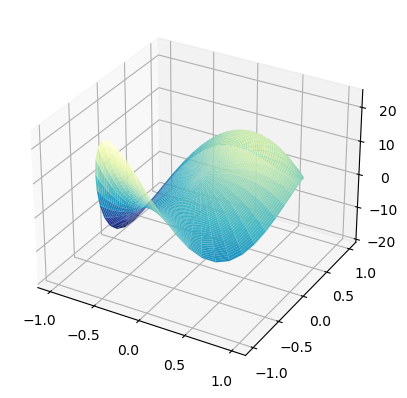

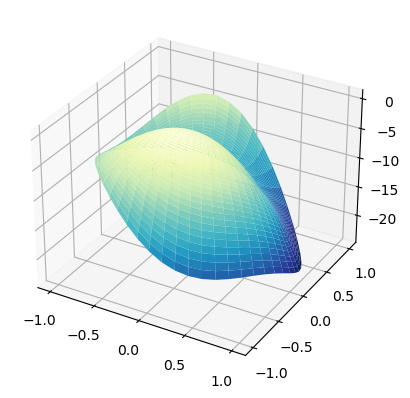

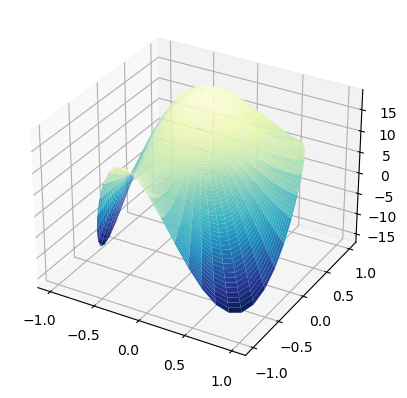

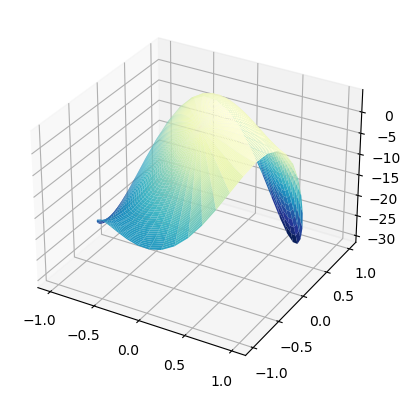

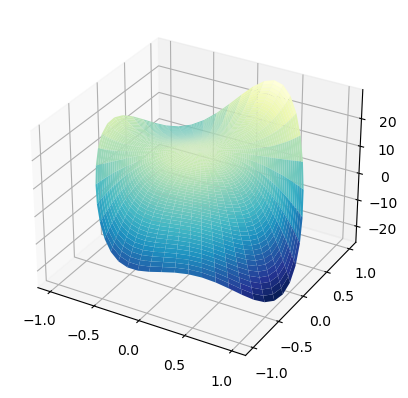

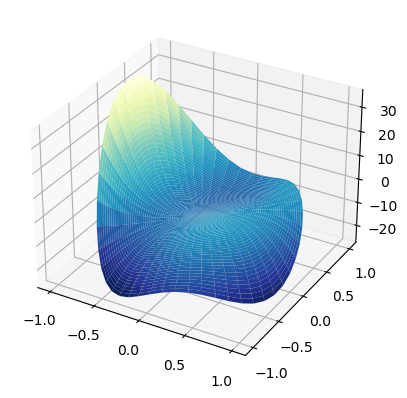

In [7]:
for i in range(0, 10):
    zernike_polynomials = get_random_zernike_coefficients()
    plot_surface(zernike_polynomials)

In [ ]:
rho_array, varphi_array = polar_samples_unit_circle_for_data_generation()
plot_2d_polar_points(rho_array, varphi_array)

In [ ]:
radiuses, thetas = polar_samples_1d_circle_for_plotting(n_samples=100)

In [ ]:
radiuses, thetas = polar_samples_1d_circle(n_circles=50, n_samples=50)
R, P = np.meshgrid(radiuses, thetas)
z = compute_zernike_polynomial_for_meshgrid(-2, 2, R, P)
y = compute_zernike_polynomial_for_meshgrid(1, 1, R, P)
Z = 0*y+z
X, Y = R*np.cos(P), R*np.sin(P)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(20, 30)
# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)


In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
print(r)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()
